OPCIÓN 2 — Agrupar manualmente según cuadrantes o umbrales PCA


In [ ]:
def clasificar_restador(row):
    if row["Score_Serve"] > 1 and row["Score_Return"] > 1:
        return "Muy buen restador"
    elif row["Score_Serve"] > -1 and row["Score_Return"] > -1:
        return "Buen restador"
    else:
        return "Mal restador"
    
df["PerfilRestador"] = df.apply(clasificar_restador, axis=1)


OPCIÓN 3 — Usar KMeans, pero ordenarlo por calidad media del grupo
Puedes mantener KMeans con 3 clusters y luego, en lugar de aceptar los clusters tal cual, etiquetar los grupos después según su media:

In [ ]:
# Calcular media de cada cluster
cluster_media = df.groupby("Cluster")[["Score_Serve", "Score_Return"]].mean()
cluster_media["media_total"] = cluster_media.mean(axis=1)

# Ordenar los clusters del peor al mejor
orden = cluster_media.sort_values("media_total").index.tolist()
etiquetas = {orden[0]: "Mal restador", orden[1]: "Buen restador", orden[2]: "Muy buen restador"}

# Asignar etiquetas al DataFrame
df["PerfilRestador"] = df["Cluster"].map(etiquetas)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("Juego_2019_23/merged_clay.csv") 


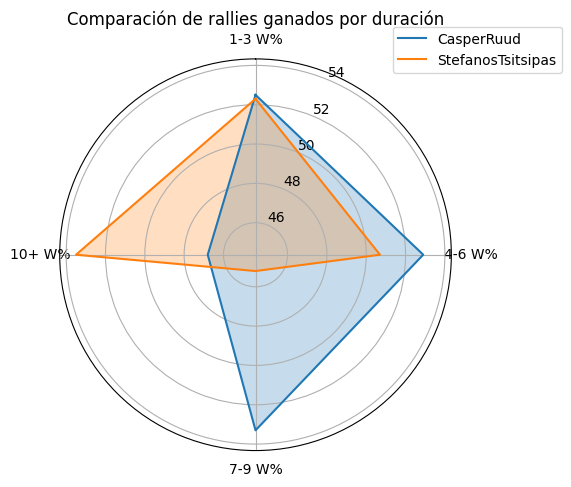

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Cargar el CSV ===
# Cambia el nombre del archivo por el tuyo si es diferente
df = pd.read_csv("Juego_2019_23/merged_clay.csv") 

# === 2. Seleccionar a los dos jugadores ===
jugadores = ['CasperRuud', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === 3. Variables de duración de rally ===
labels = ['1-3 W%', '4-6 W%', '7-9 W%', '10+ W%']

# Asegurar que las columnas existen (puedes revisar y ajustar los nombres exactos si hace falta)
if not all(label in df.columns for label in labels):
    raise ValueError("Alguna de las columnas no se encuentra en el CSV. Revisa los nombres exactos.")

# === 4. Crear ángulos para el radar chart ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el polígono

# === 5. Crear figura radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir cada jugador
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

valores_min = df_filtrado[labels].min().min()
valores_max = df_filtrado[labels].max().max()

# Ajustar márgenes para dar un poco de aire visual
margen = (valores_max - valores_min) * 0.1  # 10% de margen

# === 6. Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de rallies ganados por duración")
ax.set_ylim(valores_min - margen, valores_max + margen)  
# ax.set_yticklabels([])  # Elimina las etiquetas del eje radial

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


SE INCLUYE 100%

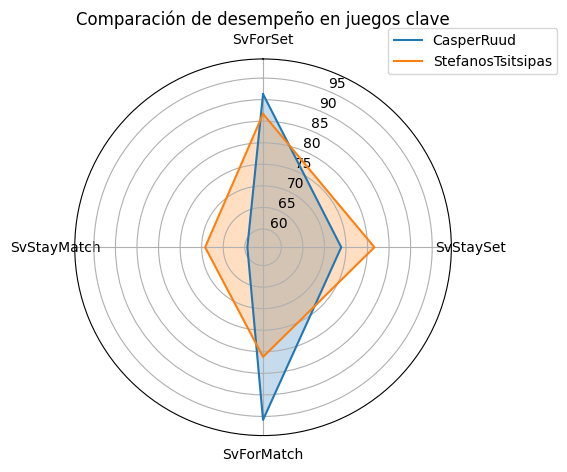

In [18]:


# === 2. Seleccionar a los dos jugadores ===
jugadores = ['CasperRuud', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === 3. Variables de duración de rally ===
labels = ['SvForSet', 'SvStaySet', 'SvForMatch', 'SvStayMatch']

# Asegurar que las columnas existen (puedes revisar y ajustar los nombres exactos si hace falta)
if not all(label in df.columns for label in labels):
    raise ValueError("Alguna de las columnas no se encuentra en el CSV. Revisa los nombres exactos.")

# === 4. Crear ángulos para el radar chart ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el polígono

# === 5. Crear figura radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir cada jugador
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

valores_min = df_filtrado[labels].min().min()
valores_max = df_filtrado[labels].max().max()

# Ajustar márgenes para dar un poco de aire visual
margen = (valores_max - valores_min) * 0.1  # 10% de margen

# === 6. Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de desempeño en juegos clave")
ax.set_ylim(valores_min - margen, valores_max + margen)  
# ax.set_yticklabels([])  # Elimina las etiquetas del eje radial

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


PUEDE SER INTERESANTE TENIEDNO EN CUENTA LOS PERFILES DE BREAK AL SERVICIO Y RESTO, TENER AL LADO CONSOL Y BREAKBACK

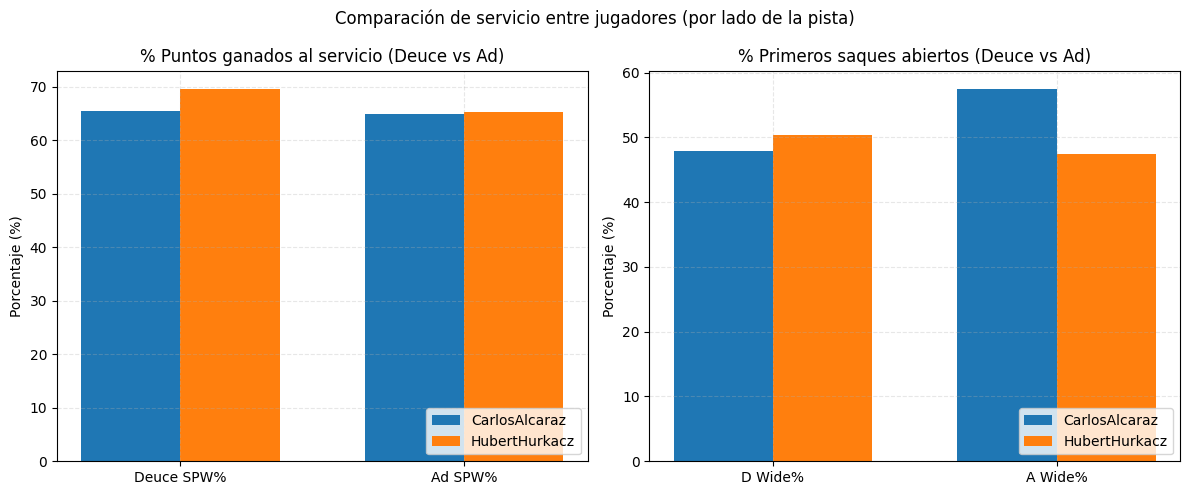

In [90]:
# === Seleccionar jugadores y estadísticas a comparar ===
jugadores = ['CarlosAlcaraz', 'HubertHurkacz']
stats_pares = [('Deuce SPW%', 'Ad SPW%'), ('D Wide%', 'A Wide%')]
titulos = ['% Puntos ganados al servicio (Deuce vs Ad)', '% Primeros saques abiertos (Deuce vs Ad)']

# === Filtrar DataFrame ===
df_jugadores = df[df['Player'].isin(jugadores)].set_index('Player')

# === Crear gráfico ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

for i, (par, titulo) in enumerate(zip(stats_pares, titulos)):
    ax = axes[i]
    x = np.arange(len(par))  # posiciones: Deuce, Ad
    width = 0.35

    # Valores para cada jugador
    valores_1 = df_jugadores.loc[jugadores[0], list(par)]
    valores_2 = df_jugadores.loc[jugadores[1], list(par)]

    ax.bar(x - width/2, valores_1, width, label=jugadores[0])
    ax.bar(x + width/2, valores_2, width, label=jugadores[1])

    ax.set_xticks(x)
    ax.set_xticklabels(par)
    ax.set_title(titulo)
    ax.set_ylabel("Porcentaje (%)")
    ax.legend(loc='lower right')
    ax.grid(True, linestyle="--", alpha=0.3)

plt.suptitle("Comparación de servicio entre jugadores (por lado de la pista)")
plt.tight_layout()
plt.show()

ENTENDER MEJOR

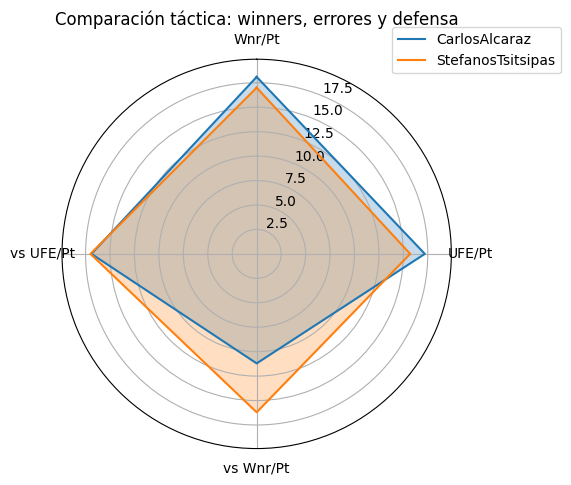

In [24]:
# === Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === Variables a comparar ===
labels = ['Wnr/Pt', 'UFE/Pt', 'vs Wnr/Pt', 'vs UFE/Pt']

# Verificar que las columnas existen
if not all(col in df.columns for col in labels):
    raise ValueError("Falta alguna columna en el CSV.")

# === Ángulos del radar ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# === Inicializar radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Función para añadir cada jugador
def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir ambos jugadores
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

# === Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación táctica: winners, errores y defensa")
ax.set_ylim(0, max(df_filtrado[labels].max()) * 1.1)  # ajuste dinámico
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

REVISAR

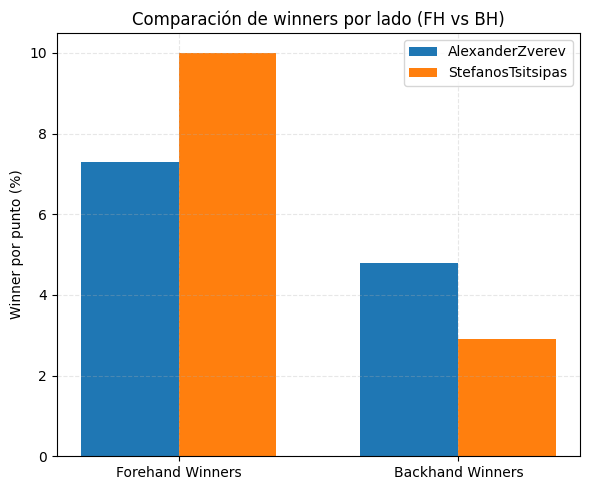

In [91]:
# === Seleccionar jugadores y métricas ===
jugadores = ['AlexanderZverev', 'StefanosTsitsipas']
metricas = ['FH Wnr/Pt', 'BH Wnr/Pt']

# Filtrar el DataFrame
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# Crear gráfico
x = np.arange(len(metricas))  # posiciones: FH, BH
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))

val1 = df_sel.loc[jugadores[0], metricas]
val2 = df_sel.loc[jugadores[1], metricas]

ax.bar(x - width/2, val1, width, label=jugadores[0])
ax.bar(x + width/2, val2, width, label=jugadores[1])

# Etiquetas
ax.set_xticks(x)
ax.set_xticklabels(['Forehand Winners', 'Backhand Winners'])
ax.set_ylabel("Winner por punto (%)")
ax.set_title("Comparación de winners por lado (FH vs BH)")
ax.legend(loc='upper right')
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

PARA VER QUIEN HACE MAS WINER, IMPORTANTE, SE INCLUYE

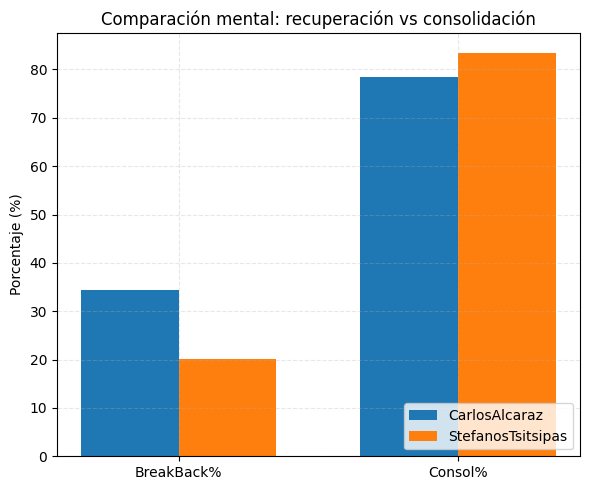

In [26]:
metricas = ['BreakBack%', 'Consol%']

# Filtrar y preparar datos
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))

val1 = df_sel.loc[jugadores[0], metricas]
val2 = df_sel.loc[jugadores[1], metricas]

# Dibujar barras
ax.bar(x - width/2, val1, width, label=jugadores[0])
ax.bar(x + width/2, val2, width, label=jugadores[1])

# Etiquetas y estilo
ax.set_xticks(x)
ax.set_xticklabels(['BreakBack%', 'Consol%'])
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Comparación mental: recuperación vs consolidación")
ax.legend(loc='lower right')
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

SE INCLUE, AQUI HAY QUE DAR MAS PESO SI EL RIVAL ES SACADOR Y CONSOL, VA A SER MAS DIFICIL, SI EL RIVAL ES BUEN RESTADOR Y ALTO BREAKBACK ES COMPLICADO

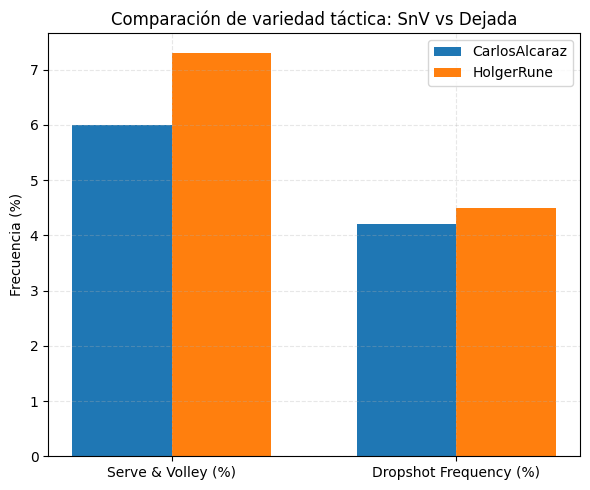

In [70]:
# === Seleccionar jugadores y estadísticas ===
jugadores = ['CarlosAlcaraz', 'HolgerRune']
metricas = ['SnV Freq', 'Drop: Freq']

# Filtrar datos
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))

val1 = df_sel.loc[jugadores[0], metricas]
val2 = df_sel.loc[jugadores[1], metricas]

# Dibujar barras
ax.bar(x - width/2, val1, width, label=jugadores[0])
ax.bar(x + width/2, val2, width, label=jugadores[1])

# Etiquetas
ax.set_xticks(x)
ax.set_xticklabels(['Serve & Volley (%)', 'Dropshot Frequency (%)'])
ax.set_ylabel("Frecuencia (%)")
ax.set_title("Comparación de variedad táctica: SnV vs Dejada")
ax.legend(loc='upper right')
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

A alcaraz le gusta cambiar el ritmo, si, tener en cuenta pero no para pesos

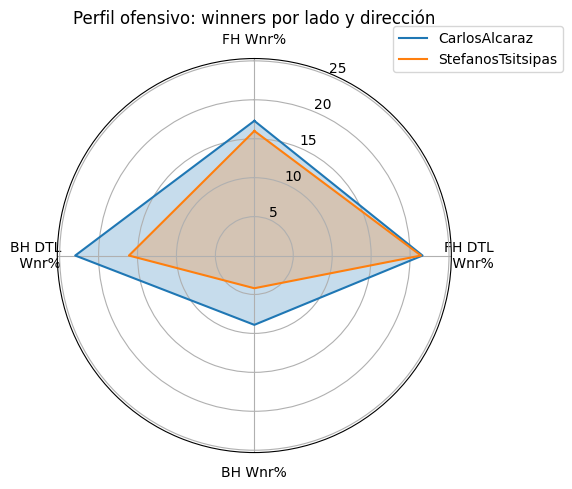

In [75]:
# === Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === Variables reales y nombres visibles personalizados ===
labels = ['FH: Wnr%', 'DTL Wnr%', 'BH: Wnr%', 'DTL Wnr%.1']
labels_mostrar = ['FH Wnr%', 'FH DTL \n Wnr%', 'BH Wnr%', 'BH DTL \n Wnr%']  # lo que verás en el gráfico

# Ángulos
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
labels_mostrar += labels_mostrar[:1]  # cerrar el radar con etiquetas también

# Crear radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

# Estética
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels_mostrar[:-1])
ax.set_title("Perfil ofensivo: winners por lado y dirección")
ax.set_ylim(0, max(df_filtrado[labels].max()) * 1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

INCLUIR, NO SE PUEDE DECIR NADA PARA PESOS PERO SI IMPORTANTE DE PUNTOS DEBILES, ver si estas o wnr de bh o fh solo (SON OTRAS DIFERENTES A ESTAS 4) CREO QUE PREFIERO LAS OTRAS 2

ESTE NO REFLEJA LA REALIAD PQ NO ES PARALELO O CRUZADO, ES PARALELO CONTRA TOTAL

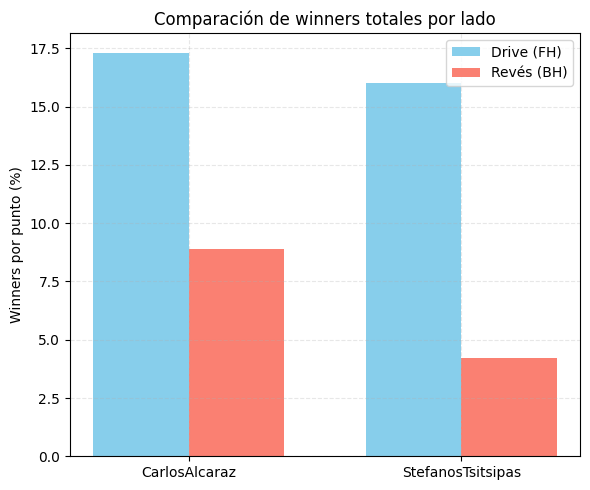

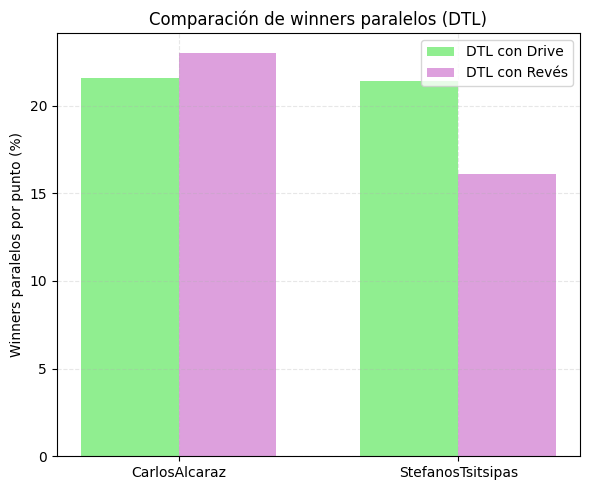

In [47]:
# Seleccionar jugadores
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

x = np.arange(len(jugadores))
width = 0.35

# === GRÁFICO 1: Winners totales por lado ===
fig, ax = plt.subplots(figsize=(6, 5))

# Valores
fh_total = df_sel['FH: Wnr%'].values
bh_total = df_sel['BH: Wnr%'].values

# Barras
ax.bar(x - width/2, fh_total, width, label='Drive (FH)', color='skyblue')
ax.bar(x + width/2, bh_total, width, label='Revés (BH)', color='salmon')

# Estética
ax.set_xticks(x)
ax.set_xticklabels(jugadores)
ax.set_ylabel("Winners por punto (%)")
ax.set_title("Comparación de winners totales por lado")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# === GRÁFICO 2: Winners paralelos (DTL) ===
fig, ax = plt.subplots(figsize=(6, 5))

# Valores
fh_dtl = df_sel['DTL Wnr%'].values
bh_dtl = df_sel['DTL Wnr%.1'].values

# Barras
ax.bar(x - width/2, fh_dtl, width, label='DTL con Drive', color='lightgreen')
ax.bar(x + width/2, bh_dtl, width, label='DTL con Revés', color='plum')

# Estética
ax.set_xticks(x)
ax.set_xticklabels(jugadores)
ax.set_ylabel("Winners paralelos por punto (%)")
ax.set_title("Comparación de winners paralelos (DTL)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

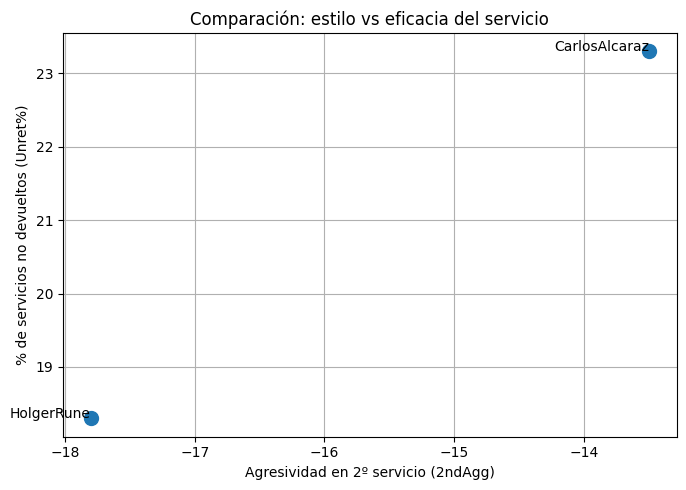

In [42]:
# Filtrar dos jugadores
jugadores = ['HolgerRune', 'CarlosAlcaraz']
df_sel = df[df['Player'].isin(jugadores)]

# === Gráfico ===
plt.figure(figsize=(7, 5))
plt.scatter(df_sel['2ndAgg'], df_sel['Unret%'], s=100)

# Etiquetas
for _, row in df_sel.iterrows():
    plt.text(row['2ndAgg'], row['Unret%'], row['Player'], fontsize=10, ha='right')

plt.xlabel('Agresividad en 2º servicio (2ndAgg)')
plt.ylabel('% de servicios no devueltos (Unret%)')
plt.title('Comparación: estilo vs eficacia del servicio')
plt.grid(True)
plt.tight_layout()
plt.show()

DUDAS PARA ESTA

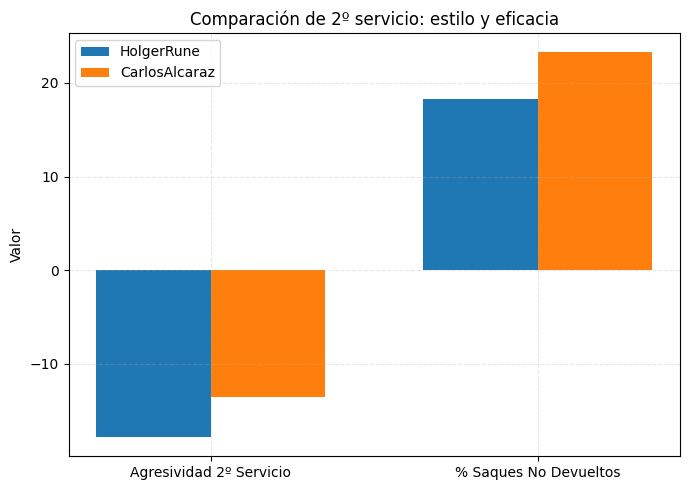

In [52]:
# === Filtrar jugadores ===
jugadores = ['HolgerRune', 'CarlosAlcaraz']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a comparar ===
variables = ['2ndAgg', 'Unret%']
labels_mostrar = ['Agresividad 2º Servicio', '% Saques No Devueltos']

# === Preparar datos ===
x = np.arange(len(variables))  # posiciones de las categorías
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))

# Dibujar barras para cada jugador
for i, jugador in enumerate(jugadores):
    valores = df_sel.loc[jugador, variables].values
    ax.bar(x + i*width - width/2, valores, width, label=jugador)

# Estética
ax.set_xticks(x)
ax.set_xticklabels(labels_mostrar)
ax.set_ylabel("Valor")
ax.set_title("Comparación de 2º servicio: estilo y eficacia")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

no estoy seguro

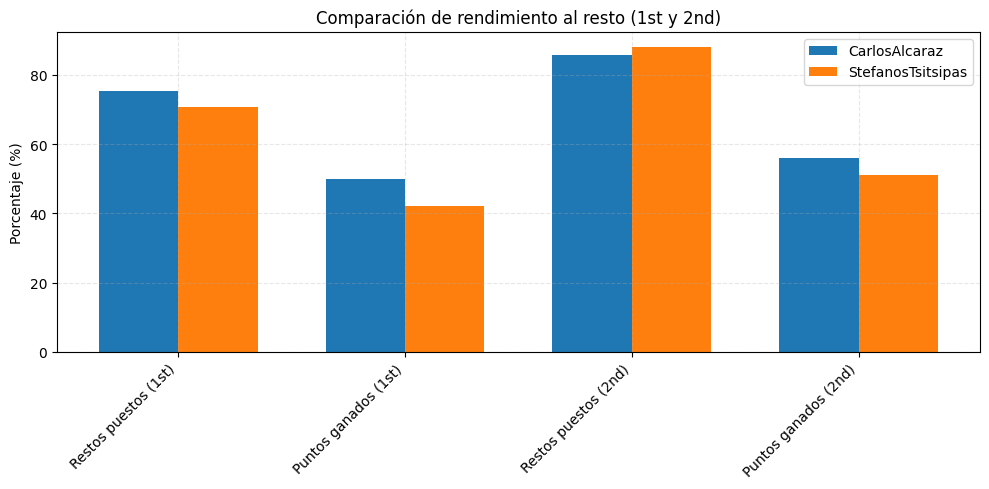

In [61]:
# === Filtrar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a mostrar ===
variables = ['1st: RiP%', 'RiP W%.1_x', '2nd: RiP%', 'RiP W%.2_x']
labels = ['Restos puestos (1st)', 'Puntos ganados (1st)', 'Restos puestos (2nd)', 'Puntos ganados (2nd)']

# === Preparar gráfico ===
x = np.arange(len(variables))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

# Dibujar barras para cada jugador
for i, jugador in enumerate(jugadores):
    valores = df_sel.loc[jugador, variables].values
    ax.bar(x + i * width - width / 2, valores, width, label=jugador)

# Estética
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Comparación de rendimiento al resto (1st y 2nd)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

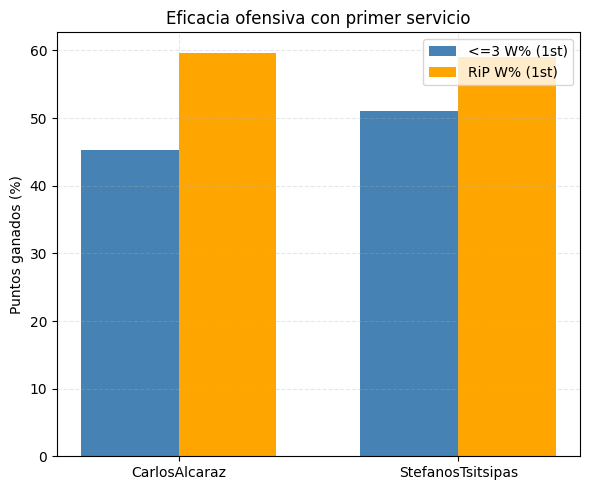

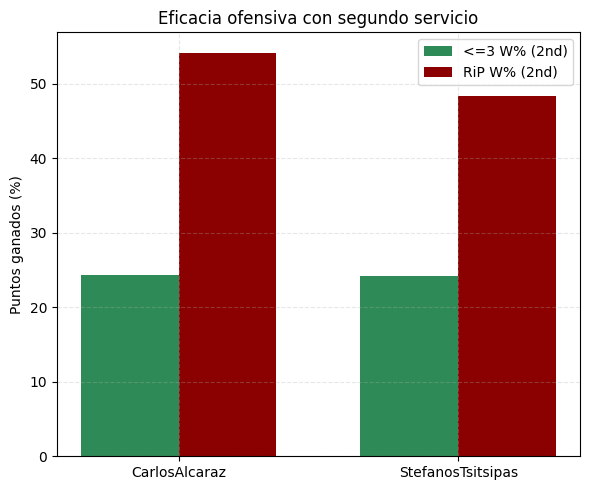

In [50]:
# === 2. Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === 3. Datos para primer servicio ===
x = np.arange(len(jugadores))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2,
       df_sel['<=3 W%.1'],
       width,
       label='<=3 W% (1st)',
       color='steelblue')

ax.bar(x + width/2,
       df_sel['RiP W%.1_y'],
       width,
       label='RiP W% (1st)',
       color='orange')

ax.set_xticks(x)
ax.set_xticklabels(jugadores)
ax.set_ylabel("Puntos ganados (%)")
ax.set_title("Eficacia ofensiva con primer servicio")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# === 4. Datos para segundo servicio ===
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2,
       df_sel['<=3 W%.2'],
       width,
       label='<=3 W% (2nd)',
       color='seagreen')

ax.bar(x + width/2,
       df_sel['RiP W%.2_y'],
       width,
       label='RiP W% (2nd)',
       color='darkred')

ax.set_xticks(x)
ax.set_xticklabels(jugadores)
ax.set_ylabel("Puntos ganados (%)")
ax.set_title("Eficacia ofensiva con segundo servicio")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

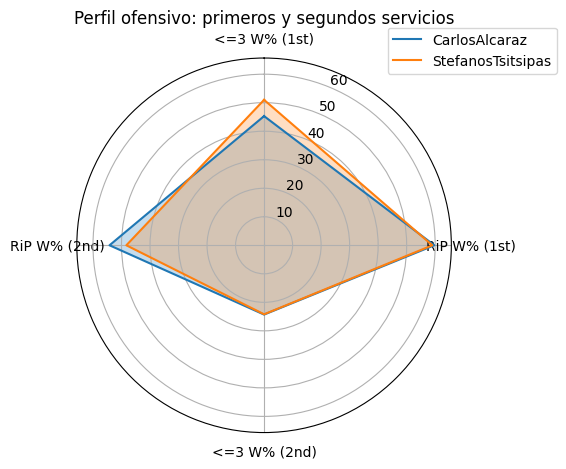

In [51]:
# === Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a mostrar ===
labels = ['<=3 W%.1', 'RiP W%.1_y', '<=3 W%.2', 'RiP W%.2_y']
etiquetas = ['<=3 W% (1st)', 'RiP W% (1st)', '<=3 W% (2nd)', 'RiP W% (2nd)']

# Ángulos del radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
etiquetas += etiquetas[:1]

# === Crear radar chart ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    valores = [row[var] for var in labels] + [row[labels[0]]]
    ax.plot(angles, valores, label=label)
    ax.fill(angles, valores, alpha=0.25)

# Añadir jugadores al gráfico
for player in jugadores:
    add_player(ax, df_sel.loc[player], player)

# Estética
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), etiquetas[:-1])
ax.set_title("Perfil ofensivo: primeros y segundos servicios")
ax.set_ylim(0, max(df_sel[labels].max()) * 1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

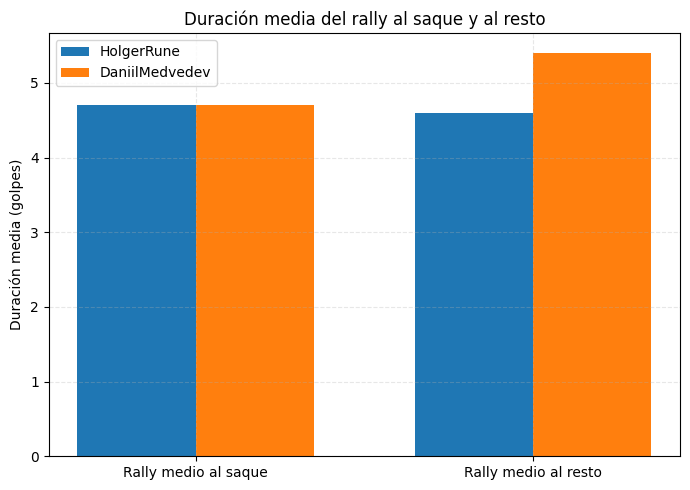

In [56]:
# === Filtrar jugadores ===
jugadores = ['HolgerRune', 'DaniilMedvedev']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a graficar ===
variables = ['RLen-Serve', 'RLen-Return']
labels_mostrar = ['Rally medio al saque', 'Rally medio al resto']

# === Posiciones y configuración ===
x = np.arange(len(variables))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))

# Dibujar barras para cada jugador
for i, jugador in enumerate(jugadores):
    valores = df_sel.loc[jugador, variables].values
    ax.bar(x + i * width - width / 2, valores, width, label=jugador)

# Estética
ax.set_xticks(x)
ax.set_xticklabels(labels_mostrar)
ax.set_ylabel("Duración media (golpes)")
ax.set_title("Duración media del rally al saque y al resto")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

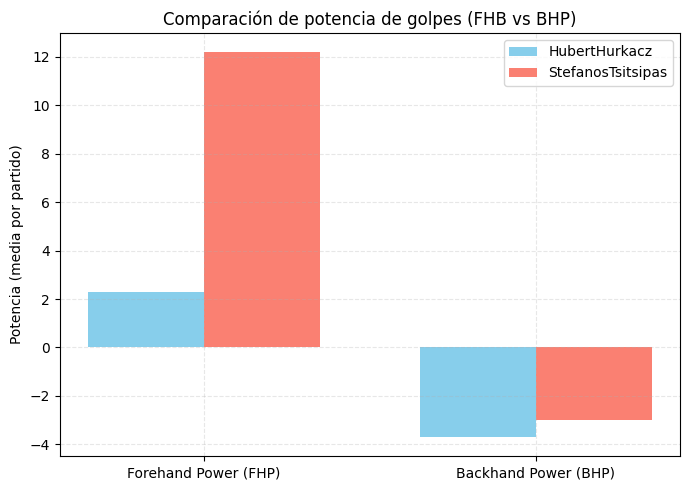

In [88]:
# === 1. Filtrar jugadores ===
jugadores = ['HubertHurkacz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === 2. Variables y configuración ===
labels = ['FHP', 'BHP']
x = np.arange(len(labels))
width = 0.35

# === 3. Valores ===
valores_j1 = df_sel.loc[jugadores[0], labels]
valores_j2 = df_sel.loc[jugadores[1], labels]

# === 4. Crear gráfico ===
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, valores_j1, width, label=jugadores[0], color='skyblue')
ax.bar(x + width/2, valores_j2, width, label=jugadores[1], color='salmon')

# === 5. Personalización ===
ax.set_ylabel('Potencia (media por partido)')
ax.set_title('Comparación de potencia de golpes (FHB vs BHP)')
ax.set_xticks(x)
ax.set_xticklabels(['Forehand Power (FHP)', 'Backhand Power (BHP)'])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Utilizar y dar peso